<a href="https://colab.research.google.com/github/Reventh-Sharma/Gas-Concentration-Prediction/blob/master/Neural_Decision_CO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import math
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/unanomalousfinal.csv')
X1=dataset.iloc[:,:].values
X1=np.append(X1,[X1[-1,:]],axis=0)

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Ethylene_CO1.csv')

In [ ]:
y = dataset.iloc[:, 2:4].values

In [ ]:
y1=np.zeros((420*1900,2))
for i in range(420):
    y1[i*1900:(i+1)*1900,:]=y[i*10000+8000:(i+1)*10000-100,:]
del dataset,y

In [ ]:
X1 = (X1-X1.mean(axis=0))/X1.max(axis=0)
y1_mean = y1.mean(axis = 0)
y1_max=y1.max(axis=0)
y2 = (y1-y1_mean)/y1_max

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y2, test_size = 0.25,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
max_depth=np.arange(1,77,5)
error_train_co=np.zeros(np.size(max_depth))
error_test_co=np.zeros(np.size(max_depth))
error_train_et=np.zeros(np.size(max_depth))
error_test_et=np.zeros(np.size(max_depth))

In [ ]:
m=0
for depth in max_depth:
    regr=DecisionTreeRegressor(max_depth=depth, min_samples_split=10, min_samples_leaf=2)
    regr.fit(X_train,y_train)
    y_pred=regr.predict(X_test)
    for i in range(0,np.size(y_pred,0)):
        for j in range(0,np.size(y_pred,1)):
            if y_pred[i,j]<-y1_mean[j]/y1_max[j]:
                y_pred[i,j]=-y1_mean[j]/y1_max[j]
    y_train_pred=regr.predict(X_train)
    error_train_co[m]=math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
    error_test_co[m]=math.sqrt(mean_squared_error(y_test[:,0], y_pred[:,0]))
    error_train_et[m]=math.sqrt(mean_squared_error(y_train[:,1], y_train_pred[:,1]))
    error_test_et[m]=math.sqrt(mean_squared_error(y_test[:,1], y_pred[:,1]))
    m=m+1

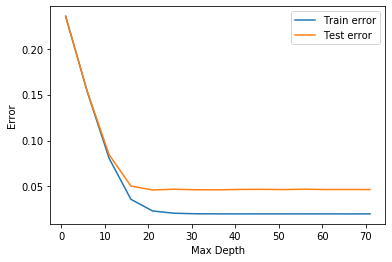

In [ ]:
plt.plot(max_depth, error_train_co, label='Train error')
plt.plot(max_depth, error_test_co, label='Test error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.legend()
plt.show()

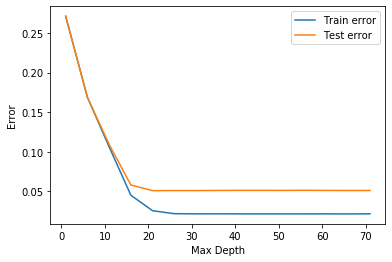

In [ ]:
plt.plot(max_depth, error_train_et, label='Train error')
plt.plot(max_depth, error_test_et, label='Test error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
depth=36

In [ ]:
regr=DecisionTreeRegressor(max_depth=depth, min_samples_split=100, min_samples_leaf=20)
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)
for i in range(0,np.size(y_pred,0)):
    for j in range(0,np.size(y_pred,1)):
        if y_pred[i,j]<-y1_mean[j]/y1_max[j]:
            y_pred[i,j]=-y1_mean[j]/y1_max[j]
error_test_co=(math.sqrt(mean_squared_error(y_test[:,0], y_pred[:,0])))
error_test_et=math.sqrt(mean_squared_error(y_test[:,1], y_pred[:,1]))
RMSE=np.array([error_test_co, error_test_et])*y1_max

In [ ]:
print("RMSE for CO prediction is",RMSE[0],"and Ethylene prediction is",RMSE[1],"respectively.")

RMSE for CO prediction is 25.580732500446935 and Ethylene prediction is 1.0754117241941938 respectively.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
max_depth=np.arange(1,52,5)
error_train_co=np.zeros(np.size(max_depth))
error_test_co=np.zeros(np.size(max_depth))
error_train_et=np.zeros(np.size(max_depth))
error_test_et=np.zeros(np.size(max_depth))

In [ ]:
m=0
for depth in max_depth:
    regr=RandomForestRegressor(max_depth=depth, min_samples_split=10, min_samples_leaf=2)
    regr.fit(X_train,y_train)
    y_pred=regr.predict(X_test)
    for i in range(0,np.size(y_pred,0)):
        for j in range(0,np.size(y_pred,1)):
            if y_pred[i,j]<-y1_mean[j]/y1_max[j]:
                y_pred[i,j]=-y1_mean[j]/y1_max[j]
    y_train_pred=regr.predict(X_train)
    error_train_co[m]=math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
    error_test_co[m]=math.sqrt(mean_squared_error(y_test[:,0], y_pred[:,0]))
    error_train_et[m]=math.sqrt(mean_squared_error(y_train[:,1], y_train_pred[:,1]))
    error_test_et[m]=math.sqrt(mean_squared_error(y_test[:,1], y_pred[:,1]))
    m=m+1

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

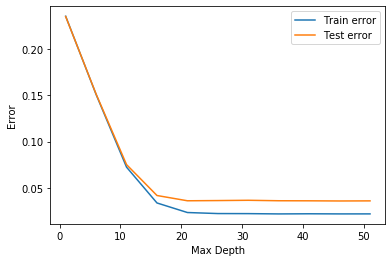

In [ ]:
plt.plot(max_depth, error_train_co, label='Train error')
plt.plot(max_depth, error_test_co, label='Test error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.legend()
plt.show()

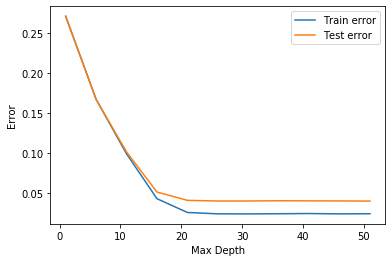

In [ ]:
plt.plot(max_depth, error_train_et, label='Train error')
plt.plot(max_depth, error_test_et, label='Test error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
depth=36

In [ ]:
regr=RandomForestRegressor(max_depth=depth, min_samples_split=10, min_samples_leaf=2)
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)
for i in range(0,np.size(y_pred,0)):
    for j in range(0,np.size(y_pred,1)):
        if y_pred[i,j]<-y1_mean[j]/y1_max[j]:
            y_pred[i,j]=-y1_mean[j]/y1_max[j]
error_test_co=(math.sqrt(mean_squared_error(y_test[:,0], y_pred[:,0])))
error_test_et=math.sqrt(mean_squared_error(y_test[:,1], y_pred[:,1]))
RMSE=np.array([error_test_co, error_test_et])*y1_max

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
print("RMSE for CO prediction is",RMSE[0],"and Ethylene prediction is",RMSE[1],"respectively.")

RMSE for CO prediction is 19.276068640038716 and Ethylene prediction is 0.7951368065559793 respectively.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
classifier = Sequential()
classifier.add(Dense(output_dim = 50, init = 'uniform', activation = 'relu', input_dim = 16))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(output_dim = 2, init = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=16, units=50, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=2, kernel_initializer="uniform")`
  


In [ ]:
count=np.arange(1,101,1)
error_train_co=np.zeros(np.size(count))
error_test_co=np.zeros(np.size(count))
error_train_et=np.zeros(np.size(count))
error_test_et=np.zeros(np.size(count))

In [ ]:
for index in count:
    classifier.fit(X_train, y_train, batch_size = 1900, nb_epoch = 5)
    y_pred = classifier.predict(X_test)
    for i in range(0,np.size(y_pred,0)):
        for j in range(0,np.size(y_pred,1)):
            if y_pred[i,j]<-y1_mean[j]/y1_max[j]:
                y_pred[i,j]=-y1_mean[j]/y1_max[j]
    y_train_pred=regr.predict(X_train)
    error_train_co[index-1]=math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
    error_test_co[index-1]=math.sqrt(mean_squared_error(y_test[:,0], y_pred[:,0]))
    error_train_et[index-1]=math.sqrt(mean_squared_error(y_train[:,1], y_train_pred[:,1]))
    error_test_et[index-1]=math.sqrt(mean_squared_error(y_test[:,1], y_pred[:,1]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0480 - acc: 0.6633
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0327 - acc: 0.7165
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0298 - acc: 0.7454
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0286 - acc: 0.7516
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0277 - acc: 0.7575
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0272 - acc: 0.7594

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0268 - acc: 0.7607
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0260 - acc: 0.7640
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0252 - acc: 0.7661
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0245 - acc: 0.7655
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0238 - acc: 0.7671
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0236 - acc: 0.7687

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0232 - acc: 0.7678
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0227 - acc: 0.7676
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0222 - acc: 0.7702
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0218 - acc: 0.7698
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0214 - acc: 0.7728
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0209 - acc: 0.7770

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0210 - acc: 0.7763
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0207 - acc: 0.7772
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0203 - acc: 0.7793
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0200 - acc: 0.7830
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0198 - acc: 0.7854
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0196 - acc: 0.7859

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0194 - acc: 0.7866
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0192 - acc: 0.7899
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0189 - acc: 0.7914
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0188 - acc: 0.7922
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0185 - acc: 0.7947
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0183 - acc: 0.7951

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0183 - acc: 0.7960
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0182 - acc: 0.7954
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0179 - acc: 0.7984
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0178 - acc: 0.7990
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0176 - acc: 0.8000
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0176 - acc: 0.7983

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0174 - acc: 0.7993
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0173 - acc: 0.7997
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0172 - acc: 0.8014
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0170 - acc: 0.8025
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0168 - acc: 0.8034
Epoch 1/5
 53200/598500 [=>............................] - ETA: 1s - loss: 0.0166 - acc: 0.8021

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0167 - acc: 0.8028
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0167 - acc: 0.8058
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0165 - acc: 0.8058
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0163 - acc: 0.8082
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0162 - acc: 0.8085
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0160 - acc: 0.8093

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0160 - acc: 0.8093
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0159 - acc: 0.8087
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0158 - acc: 0.8113
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0157 - acc: 0.8115
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0157 - acc: 0.8116
Epoch 1/5
 51300/598500 [=>............................] - ETA: 1s - loss: 0.0158 - acc: 0.8130

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0156 - acc: 0.8126
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0154 - acc: 0.8135
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0154 - acc: 0.8145
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0152 - acc: 0.8145
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0151 - acc: 0.8153
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0151 - acc: 0.8149

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0151 - acc: 0.8161
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0150 - acc: 0.8169
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0150 - acc: 0.8159
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0148 - acc: 0.8176
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0147 - acc: 0.8177
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0148 - acc: 0.8152

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0147 - acc: 0.8177
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0146 - acc: 0.8176
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0146 - acc: 0.8190
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0145 - acc: 0.8186
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0145 - acc: 0.8178
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0145 - acc: 0.8197

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0144 - acc: 0.8189
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0145 - acc: 0.8199
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0143 - acc: 0.8203
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0142 - acc: 0.8209
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0142 - acc: 0.8206
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0141 - acc: 0.8219

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0141 - acc: 0.8207
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0141 - acc: 0.8208
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0142 - acc: 0.8211
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0140 - acc: 0.8227
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0140 - acc: 0.8219
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0139 - acc: 0.8250

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0139 - acc: 0.8228
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0139 - acc: 0.8229
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0138 - acc: 0.8225
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0137 - acc: 0.8239
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0138 - acc: 0.8249
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0138 - acc: 0.8227

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0138 - acc: 0.8254
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0137 - acc: 0.8259
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0137 - acc: 0.8261
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0136 - acc: 0.8256
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0137 - acc: 0.8263
Epoch 1/5
 66500/598500 [==>...........................] - ETA: 1s - loss: 0.0137 - acc: 0.8309

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0137 - acc: 0.8252
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0136 - acc: 0.8268
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0135 - acc: 0.8251
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0135 - acc: 0.8278
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0135 - acc: 0.8277
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0134 - acc: 0.8291

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0134 - acc: 0.8283
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0134 - acc: 0.8281
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0133 - acc: 0.8283
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0133 - acc: 0.8281
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0133 - acc: 0.8297
Epoch 1/5
 64600/598500 [==>...........................] - ETA: 1s - loss: 0.0132 - acc: 0.8255

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0133 - acc: 0.8276
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0132 - acc: 0.8300
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0133 - acc: 0.8294
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0132 - acc: 0.8302
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0132 - acc: 0.8296
Epoch 1/5
 55100/598500 [=>............................] - ETA: 1s - loss: 0.0130 - acc: 0.8277

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0131 - acc: 0.8298
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0131 - acc: 0.8302
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0131 - acc: 0.8298
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0132 - acc: 0.8306
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0131 - acc: 0.8317
Epoch 1/5
 64600/598500 [==>...........................] - ETA: 1s - loss: 0.0131 - acc: 0.8340

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0131 - acc: 0.8317
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0131 - acc: 0.8307
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0131 - acc: 0.8295
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0131 - acc: 0.8302
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0130 - acc: 0.8306
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0128 - acc: 0.8321

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0130 - acc: 0.8309
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0129 - acc: 0.8311
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0129 - acc: 0.8313
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0130 - acc: 0.8311
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0128 - acc: 0.8325
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0132 - acc: 0.8325

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0128 - acc: 0.8322
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0129 - acc: 0.8319
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0129 - acc: 0.8316
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0128 - acc: 0.8330
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0128 - acc: 0.8338
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0127 - acc: 0.8315

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0127 - acc: 0.8327
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0128 - acc: 0.8330
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0128 - acc: 0.8324
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0127 - acc: 0.8338
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0126 - acc: 0.8336
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0126 - acc: 0.8320

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0128 - acc: 0.8338
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0127 - acc: 0.8334
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0128 - acc: 0.8331
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0127 - acc: 0.8341
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0127 - acc: 0.8335
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0126 - acc: 0.8378

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0126 - acc: 0.8351
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0127 - acc: 0.8338
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0127 - acc: 0.8340
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0127 - acc: 0.8358
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0127 - acc: 0.8355
Epoch 1/5
 55100/598500 [=>............................] - ETA: 1s - loss: 0.0125 - acc: 0.8382

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0126 - acc: 0.8359
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0126 - acc: 0.8352
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0126 - acc: 0.8371
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0126 - acc: 0.8347
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0126 - acc: 0.8366
Epoch 1/5
 55100/598500 [=>............................] - ETA: 1s - loss: 0.0125 - acc: 0.8386

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0126 - acc: 0.8355
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0126 - acc: 0.8347
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0126 - acc: 0.8358
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0125 - acc: 0.8372
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0125 - acc: 0.8373
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0126 - acc: 0.8357

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0125 - acc: 0.8356
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0125 - acc: 0.8365
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0125 - acc: 0.8365
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0125 - acc: 0.8372
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0125 - acc: 0.8370
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0122 - acc: 0.8358

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0126 - acc: 0.8363
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0125 - acc: 0.8370
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0124 - acc: 0.8385
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0125 - acc: 0.8376
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0125 - acc: 0.8392
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0124 - acc: 0.8368

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0125 - acc: 0.8383
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0124 - acc: 0.8369
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0124 - acc: 0.8392
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0124 - acc: 0.8377
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0124 - acc: 0.8390
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0125 - acc: 0.8397

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0125 - acc: 0.8364
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0124 - acc: 0.8388
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0124 - acc: 0.8390
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0124 - acc: 0.8382
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0124 - acc: 0.8377
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0124 - acc: 0.8417

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0124 - acc: 0.8387
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0124 - acc: 0.8376
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0123 - acc: 0.8388
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0124 - acc: 0.8378
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0123 - acc: 0.8391
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0122 - acc: 0.8369

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0124 - acc: 0.8363
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0123 - acc: 0.8388
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0124 - acc: 0.8392
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0123 - acc: 0.8402
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8397
Epoch 1/5
 66500/598500 [==>...........................] - ETA: 1s - loss: 0.0124 - acc: 0.8427

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8406
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8400
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0123 - acc: 0.8375
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0123 - acc: 0.8380
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0123 - acc: 0.8402
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0122 - acc: 0.8490

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8411
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0123 - acc: 0.8402
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8400
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8386
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0124 - acc: 0.8386
Epoch 1/5
 66500/598500 [==>...........................] - ETA: 1s - loss: 0.0124 - acc: 0.8360

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8391
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0123 - acc: 0.8396
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8396
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0123 - acc: 0.8408
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8419
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0121 - acc: 0.8403

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8412
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8405
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8415
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8401
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8403
Epoch 1/5
 64600/598500 [==>...........................] - ETA: 1s - loss: 0.0122 - acc: 0.8434

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8406
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8398
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8410
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8419
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8390
Epoch 1/5
 68400/598500 [==>...........................] - ETA: 1s - loss: 0.0119 - acc: 0.8417

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8407
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8435
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8404
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8412
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8400
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0123 - acc: 0.8447

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0122 - acc: 0.8421
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8419
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8423
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8408
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8426
Epoch 1/5
 53200/598500 [=>............................] - ETA: 1s - loss: 0.0118 - acc: 0.8436

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8415
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8434
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8435
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8433
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8417
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0120 - acc: 0.8457

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8458
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8446
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8423
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8437
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8434
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0119 - acc: 0.8462

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8442
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8413
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0121 - acc: 0.8441
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8447
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8444
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0119 - acc: 0.8478

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8455
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8437
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8436
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8447
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8448
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0118 - acc: 0.8484

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8459
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8460
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8459
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8452
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8459
Epoch 1/5
 68400/598500 [==>...........................] - ETA: 1s - loss: 0.0121 - acc: 0.8455

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8458
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8464
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8467
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8466
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8445
Epoch 1/5
 55100/598500 [=>............................] - ETA: 1s - loss: 0.0120 - acc: 0.8474

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8465
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0120 - acc: 0.8441
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8445
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8462
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8447
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0118 - acc: 0.8460

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8457
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8460
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8468
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8465
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8463
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0118 - acc: 0.8510

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8473
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8455
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8458
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8452
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8470
Epoch 1/5
 64600/598500 [==>...........................] - ETA: 1s - loss: 0.0118 - acc: 0.8450

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8449
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8463
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8482
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8463
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8468
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0119 - acc: 0.8451

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8473
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8460
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8465
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8474
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8468
Epoch 1/5
 64600/598500 [==>...........................] - ETA: 1s - loss: 0.0117 - acc: 0.8439

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0119 - acc: 0.8467
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8482
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8491
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8469
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8485
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0115 - acc: 0.8456

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8473
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8497
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8494
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8497
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8485
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0118 - acc: 0.8514

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8506
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8491
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8492
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8506
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8487
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0120 - acc: 0.8441

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8460
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8497
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8491
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8483
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0118 - acc: 0.8480
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0116 - acc: 0.8487

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8511
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8510
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8506
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8517
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8482
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0118 - acc: 0.8532

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8502
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8502
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8503
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8502
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8506
Epoch 1/5
 66500/598500 [==>...........................] - ETA: 1s - loss: 0.0117 - acc: 0.8478

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8507
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8506
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8505
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8503
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8514
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0116 - acc: 0.8533

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8509
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8508
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8519
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8533
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8529
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0115 - acc: 0.8500

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8517
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8516
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8518
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8529
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8516
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0116 - acc: 0.8530

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8537
Epoch 2/5
598500/598500 [==============================] - 1s 2us/step - loss: 0.0117 - acc: 0.8522
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8534
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8530
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8526
Epoch 1/5
 66500/598500 [==>...........................] - ETA: 1s - loss: 0.0116 - acc: 0.8536

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8536
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8540
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8531
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8534
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8537
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0117 - acc: 0.8571

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8545
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8545
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8537
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8545
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8548
Epoch 1/5
 64600/598500 [==>...........................] - ETA: 1s - loss: 0.0115 - acc: 0.8519

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8534
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8554
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0117 - acc: 0.8513
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8541
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8543
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0115 - acc: 0.8561

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8534
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8537
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8554
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8549
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8553
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0115 - acc: 0.8557

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8549
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8542
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8545
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8540
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8537
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0116 - acc: 0.8517

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8559
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8545
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8558
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8564
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8560
Epoch 1/5
 64600/598500 [==>...........................] - ETA: 1s - loss: 0.0116 - acc: 0.8576

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8545
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8543
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8563
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8541
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8550
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0115 - acc: 0.8561

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8551
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8554
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8567
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8556
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8573
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0115 - acc: 0.8537

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8552
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8543
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8534
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8536
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8553
Epoch 1/5
 64600/598500 [==>...........................] - ETA: 1s - loss: 0.0112 - acc: 0.8572

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8549
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8550
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8565
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8539
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8538
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0116 - acc: 0.8602

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8567
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0116 - acc: 0.8547
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8549
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8558
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8542
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0114 - acc: 0.8489

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8551
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8545
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8548
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8544
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8545
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0113 - acc: 0.8545

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8551
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8543
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8555
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8546
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8564
Epoch 1/5
 66500/598500 [==>...........................] - ETA: 1s - loss: 0.0114 - acc: 0.8563

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8561
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8546
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8567
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8556
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8538
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0114 - acc: 0.8555

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8561
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8560
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8553
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8572
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8575
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0114 - acc: 0.8574

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8564
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8563
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8566
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0115 - acc: 0.8541
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8548
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0113 - acc: 0.8591

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8555
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8552
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8543
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8569
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8571
Epoch 1/5
 55100/598500 [=>............................] - ETA: 1s - loss: 0.0111 - acc: 0.8624

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8561
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8576
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8561
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8548
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8566
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0114 - acc: 0.8595

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8571
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8546
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8559
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8574
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8562
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0117 - acc: 0.8580

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8557
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8560
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8549
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8560
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8553
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0112 - acc: 0.8570

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8569
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8557
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8559
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8557
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8563
Epoch 1/5
 64600/598500 [==>...........................] - ETA: 1s - loss: 0.0113 - acc: 0.8538

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0114 - acc: 0.8557
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8563
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8547
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8558
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8543
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0113 - acc: 0.8517

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8559
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8567
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8576
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8558
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8572
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0113 - acc: 0.8548

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8557
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8553
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8557
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0111 - acc: 0.8588
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8574
Epoch 1/5
 58900/598500 [=>............................] - ETA: 1s - loss: 0.0114 - acc: 0.8537

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8563
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8557
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8574
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8571
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8565
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0111 - acc: 0.8604

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8556
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8567
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8571
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8557
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8578
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0111 - acc: 0.8601

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8575
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8557
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8568
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8569
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8581
Epoch 1/5
 64600/598500 [==>...........................] - ETA: 1s - loss: 0.0112 - acc: 0.8595

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8576
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8579
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8566
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8569
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8550
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0114 - acc: 0.8497

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0111 - acc: 0.8573
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8575
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0111 - acc: 0.8570
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8569
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8563
Epoch 1/5
 64600/598500 [==>...........................] - ETA: 1s - loss: 0.0111 - acc: 0.8594

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8565
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8580
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8575
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8581
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0111 - acc: 0.8579
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0111 - acc: 0.8616

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8580
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8579
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8572
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8565
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8567
Epoch 1/5
 60800/598500 [==>...........................] - ETA: 1s - loss: 0.0113 - acc: 0.8575

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8585
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8590
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8588
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0111 - acc: 0.8584
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0111 - acc: 0.8582
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0111 - acc: 0.8554

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8583
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8568
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8558
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8573
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8577
Epoch 1/5
 64600/598500 [==>...........................] - ETA: 1s - loss: 0.0115 - acc: 0.8553

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8557
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8583
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0111 - acc: 0.8590
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0113 - acc: 0.8568
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8590
Epoch 1/5
 53200/598500 [=>............................] - ETA: 1s - loss: 0.0111 - acc: 0.8622

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8574
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0111 - acc: 0.8586
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8585
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8578
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0111 - acc: 0.8597
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0111 - acc: 0.8611

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0111 - acc: 0.8586
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0111 - acc: 0.8575
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0111 - acc: 0.8577
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8589
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0111 - acc: 0.8583
Epoch 1/5
 57000/598500 [=>............................] - ETA: 1s - loss: 0.0111 - acc: 0.8595

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8583
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8571
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8574
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8582
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0111 - acc: 0.8589
Epoch 1/5
 62700/598500 [==>...........................] - ETA: 1s - loss: 0.0111 - acc: 0.8572

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8580
Epoch 2/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8569
Epoch 3/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0112 - acc: 0.8580
Epoch 4/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0110 - acc: 0.8572
Epoch 5/5
598500/598500 [==============================] - 2s 3us/step - loss: 0.0111 - acc: 0.8585


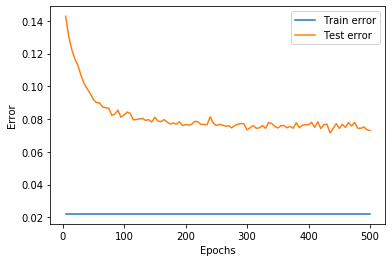

In [ ]:
plt.plot(count*5, error_train_co, label='Train error')
plt.plot(count*5, error_test_co, label='Test error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

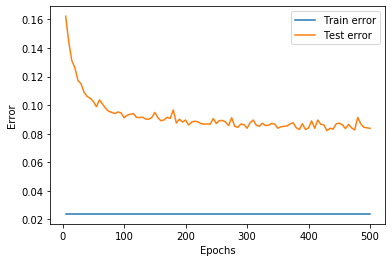

In [ ]:
plt.plot(count*5, error_train_et, label='Train error')
plt.plot(count*5, error_test_et, label='Test error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
epochs=430

In [ ]:
classifier.fit(X_train, y_train, batch_size = 1900, nb_epoch = epochs)
y_pred = classifier.predict(X_test)
for i in range(0,np.size(y_pred,0)):
    for j in range(0,np.size(y_pred,1)):
        if y_pred[i,j]<-y1_mean[j]/y1_max[j]:
            y_pred[i,j]=-y1_mean[j]/y1_max[j]
error_test_co=math.sqrt(mean_squared_error(y_test[:,0], y_pred[:,0]))
error_test_et=math.sqrt(mean_squared_error(y_test[:,1], y_pred[:,1]))
RMSE=np.array([error_test_co, error_test_et])*y1_max

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/430
598500/598500 [==============================] - 2s 4us/step - loss: 0.0470 - acc: 0.6792
Epoch 2/430
598500/598500 [==============================] - 2s 3us/step - loss: 0.0319 - acc: 0.7165
Epoch 3/430
598500/598500 [==============================] - 2s 3us/step - loss: 0.0297 - acc: 0.7267
Epoch 4/430
598500/598500 [==============================] - 2s 3us/step - loss: 0.0286 - acc: 0.7304
Epoch 5/430
598500/598500 [==============================] - 2s 3us/step - loss: 0.0277 - acc: 0.7316
Epoch 6/430
598500/598500 [==============================] - 2s 3us/step - loss: 0.0270 - acc: 0.7354
Epoch 7/430
598500/598500 [==============================] - 2s 3us/step - loss: 0.0263 - acc: 0.7413
Epoch 8/430
598500/598500 [==============================] - 2s 3us/step - loss: 0.0257 - acc: 0.7435
Epoch 9/430
598500/598500 [==============================] - 2s 3us/step - loss: 0.0250 - acc: 0.7439
Epoch 10/430
598500/598500 [==============================] - 2s 3us/step - loss: 

In [ ]:
print("RMSE for CO prediction is",RMSE[0],"and Ethylene prediction is",RMSE[1],"respectively.")

In [ ]:
y1_max